In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset
data = pd.read_csv('../raw_data/data_cleaned_2021.csv')

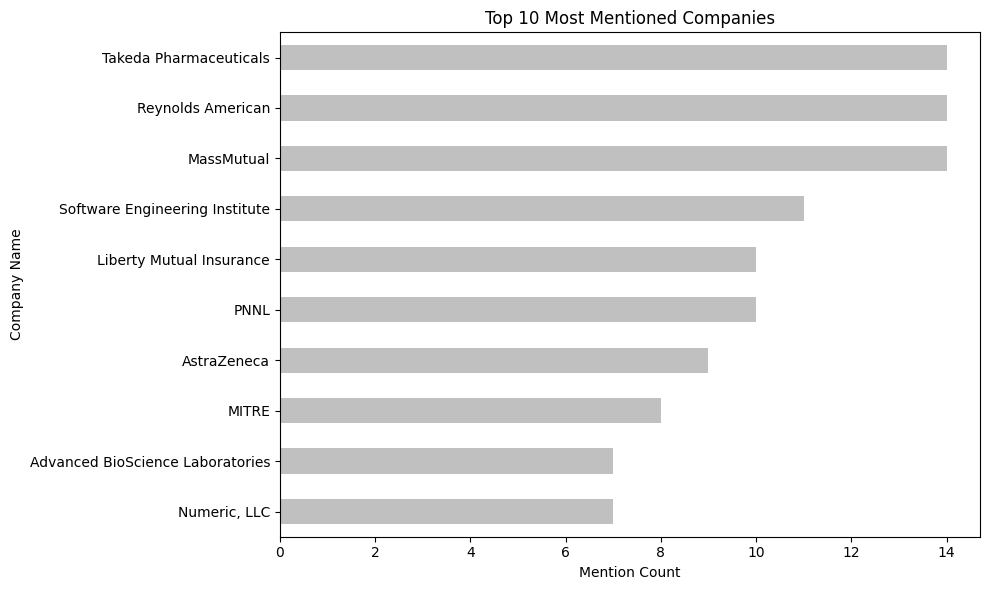

In [24]:
# 1. Top 20 Most Mentioned Companies
# Clean company names by removing the ratings and trailing spaces
data['Company Name Clean'] = data['Company Name'].str.split('\n').str[0]

# Get the top 20 most mentioned companies
top_20_most_mentioned_companies = data['Company Name Clean'].value_counts().head(10).sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
top_20_most_mentioned_companies.plot(kind='barh', color='silver')
plt.title('Top 10 Most Mentioned Companies')
plt.xlabel('Mention Count')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()


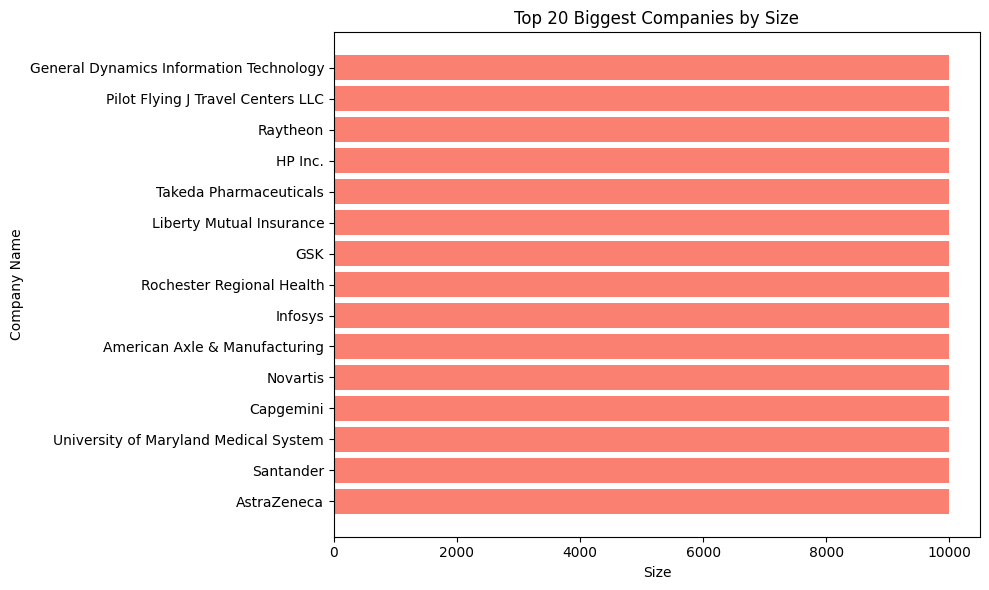

In [12]:
# Clean company names by removing the ratings and trailing spaces
data['Company Name Clean'] = data['Company Name'].str.split('\n').str[0]

# Cleaning and standardizing the Size column to extract numerical values for sorting
data['Size'] = data['Size'].str.strip()
size_mapping = {
    '1 - 50': 50,
    '51 - 200': 200,
    '201 - 500': 500,
    '501 - 1000': 1000,
    '1001 - 5000': 5000,
    '5001 - 10000': 10000,
    '10000+': 10001  # Consider 10000+ as 10001 for sorting purposes
}

data['Size_numeric'] = data['Size'].map(size_mapping)
top_20_biggest_companies = data.sort_values(by='Size_numeric', ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_20_biggest_companies['Company Name Clean'], top_20_biggest_companies['Size_numeric'], color='salmon')
plt.title('Top 20 Biggest Companies by Size')
plt.xlabel('Size')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()


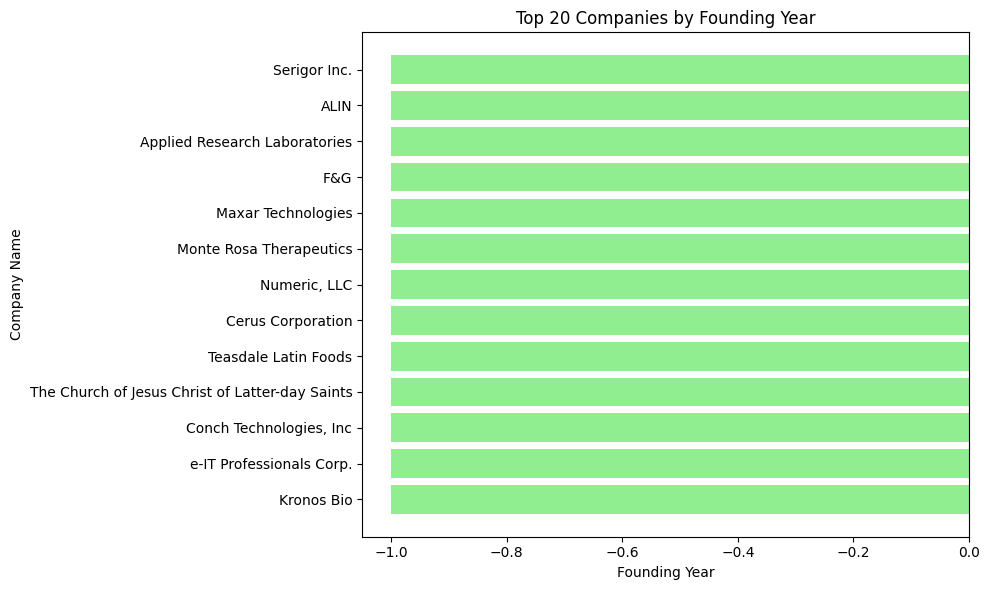

In [13]:
### 3. Top 20 Companies by Founding Year
# Top 20 Companies by Founding Year
top_20_founded_companies = data.sort_values(by='Founded', ascending=True)[['Company Name Clean', 'Founded']].dropna().head(20)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_20_founded_companies['Company Name Clean'], top_20_founded_companies['Founded'], color='lightgreen')
plt.xticks(rotation=0)
plt.title('Top 20 Companies by Founding Year')
plt.xlabel('Founding Year')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()

In [14]:
### 4. Top 20 Industries with Most Job Offers

# Clean and transform the 'Salary Estimate' column if not already done
def extract_salary(salary_str):
    match = re.search(r'\$([0-9K]+)-\$([0-9K]+)', salary_str)
    if match:
        low, high = match.groups()
        low = int(low.replace('K', '')) * 1000
        high = int(high.replace('K', '')) * 1000
        return (low + high) / 2
    return None

data['Salary Estimate Cleaned'] = data['Salary Estimate'].apply(extract_salary)

# Filter data for the top 20 industries with most job offers
industry_job_offers = data['Industry'].value_counts().head(20)
industry_order = industry_job_offers.index.tolist()
industry_salaries = data[data['Industry'].isin(industry_order)]

# Plotting Top 20 Industries with Most Job Offers
plt.figure(figsize=(10, 6))
industry_job_offers[industry_order].plot(kind='barh', color='purple')
plt.title('Top 20 Industries with Most Job Offers')
plt.xlabel('Job Offers')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

NameError: name 're' is not defined

In [ ]:
### 5. Seniority by Title: Pie or Bar Chart
seniority_counts = data['seniority_by_title'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
seniority_counts.plot(kind='bar', color='orange')
plt.title('Seniority by Title')
plt.ylabel('Seniority Level')
plt.xlabel('Count')
plt.tight_layout()
plt.show()



In [ ]:
### 6. Degree: Chart (What Does It Mean?)
degree_counts = data['Degree'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
degree_counts.plot(kind='bar', color='cyan')
plt.title('Degree Requirements')
plt.ylabel('Degree')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# Vérifier les colonnes disponibles
print(data.columns)

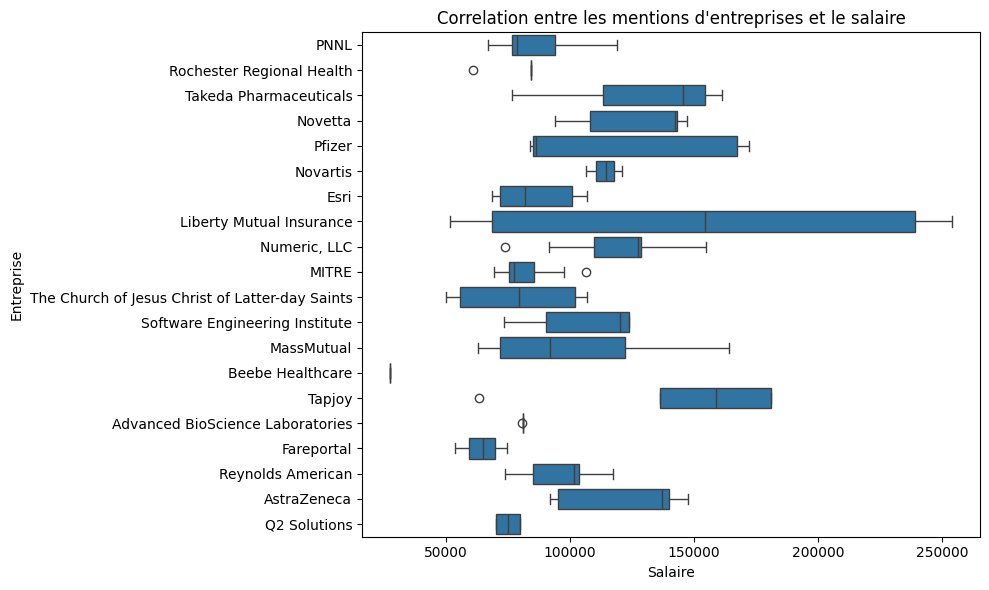

In [15]:
import re
import seaborn as sns

# Function to clean and extract salary estimates
def extract_salary(salary_str):
    match = re.search(r'\$([0-9K]+)-\$([0-9K]+)', salary_str)
    if match:
        low, high = match.groups()
        low = int(low.replace('K', '')) * 1000
        high = int(high.replace('K', '')) * 1000
        return (low + high) / 2
    return None

# Clean and transform the 'Salary Estimate' column
data['Salary Estimate Cleaned'] = data['Salary Estimate'].apply(extract_salary)

# Clean company names
data['Company Name Clean'] = data['Company Name'].str.replace(r'\n.*', '', regex=True)

# Filter data for the top 20 most mentioned companies
top_20_most_mentioned_companies = data['Company Name Clean'].value_counts().head(20).index
mentioned_salaries = data[data['Company Name Clean'].isin(top_20_most_mentioned_companies)]

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(y='Company Name Clean', x='Salary Estimate Cleaned', data=mentioned_salaries)
plt.title('Correlation entre les mentions d\'entreprises et le salaire')
plt.xlabel('Salaire')
plt.ylabel('Entreprise')
plt.tight_layout()
plt.show()


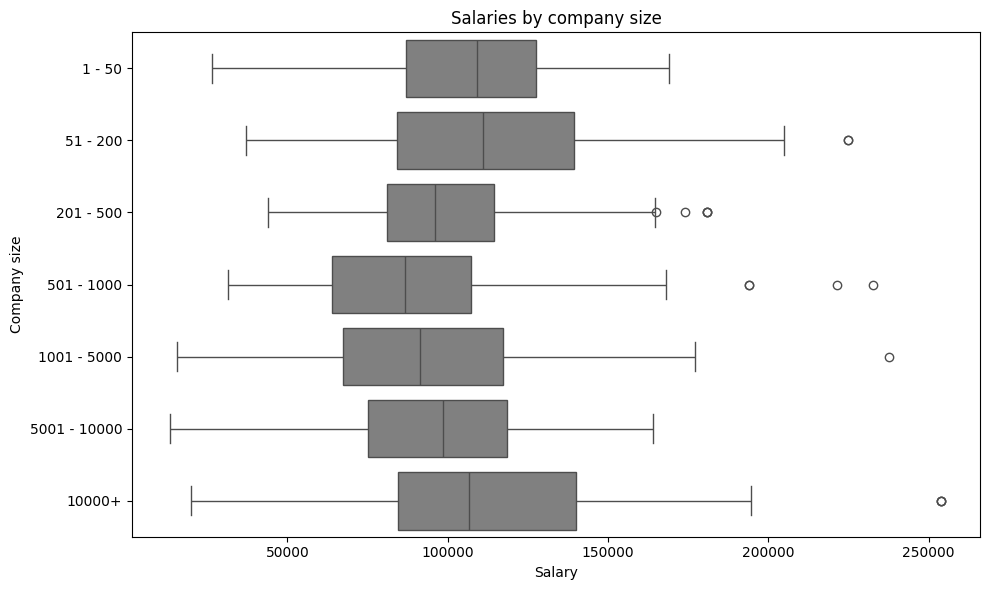

In [23]:
# 2. Correlation entre la taille des entreprises et le salaire
# Correct the size mapping dictionary to match the cleaned values
size_mapping = {
    '1 - 50': 50,
    '51 - 200': 200,
    '201 - 500': 500,
    '501 - 1000': 1000,
    '1001 - 5000': 5000,
    '5001 - 10000': 10000,
    '10000+': 10001  # Consider 10000+ as 10001 for sorting purposes
}

# Map the 'Size' column to numerical values
data['Size_numeric'] = data['Size'].map(size_mapping)

# Function to clean and extract salary estimates
def extract_salary(salary_str):
    match = re.search(r'\$([0-9K]+)-\$([0-9K]+)', salary_str)
    if match:
        low, high = match.groups()
        low = int(low.replace('K', '')) * 1000
        high = int(high.replace('K', '')) * 1000
        return (low + high) / 2
    return None

# Clean and transform the 'Salary Estimate' column
data['Salary Estimate Cleaned'] = data['Salary Estimate'].apply(extract_salary)

# Plotting correlation between company size and salary
plt.figure(figsize=(10, 6))
sns.boxplot(y='Size', x='Salary Estimate Cleaned', data=data, order=size_mapping.keys(), color = "grey")
plt.title('Salaries by company size')
plt.xlabel('Salary')
plt.ylabel('Company size')
plt.tight_layout()
plt.show()

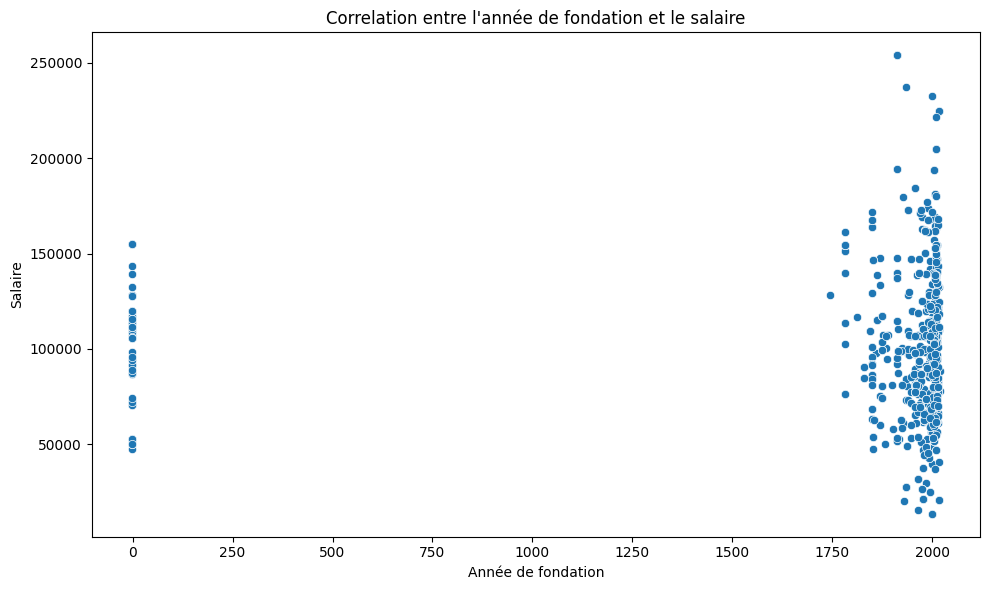

In [17]:
# 3. Correlation entre l'année de fondation et le salaire
# Clean and transform the 'Salary Estimate' column
data['Salary Estimate Cleaned'] = data['Salary Estimate'].apply(extract_salary)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Founded', y='Salary Estimate Cleaned', data=data)
plt.title('Correlation entre l\'année de fondation et le salaire')
plt.xlabel('Année de fondation')
plt.ylabel('Salaire')
plt.tight_layout()
plt.show()

In [18]:
# 4. Correlation entre l'industrie et le salaire

# Plotting Correlation between Industry and Salary
plt.figure(figsize=(10, 6))
sns.boxplot(y='Industry', x='Salary Estimate Cleaned', data=industry_salaries, order=industry_order)
plt.title('Correlation entre l\'industrie et le salaire')
plt.xlabel('Salaire')
plt.ylabel('Industrie')
plt.tight_layout()
plt.show()

NameError: name 'industry_salaries' is not defined

<Figure size 1000x600 with 0 Axes>

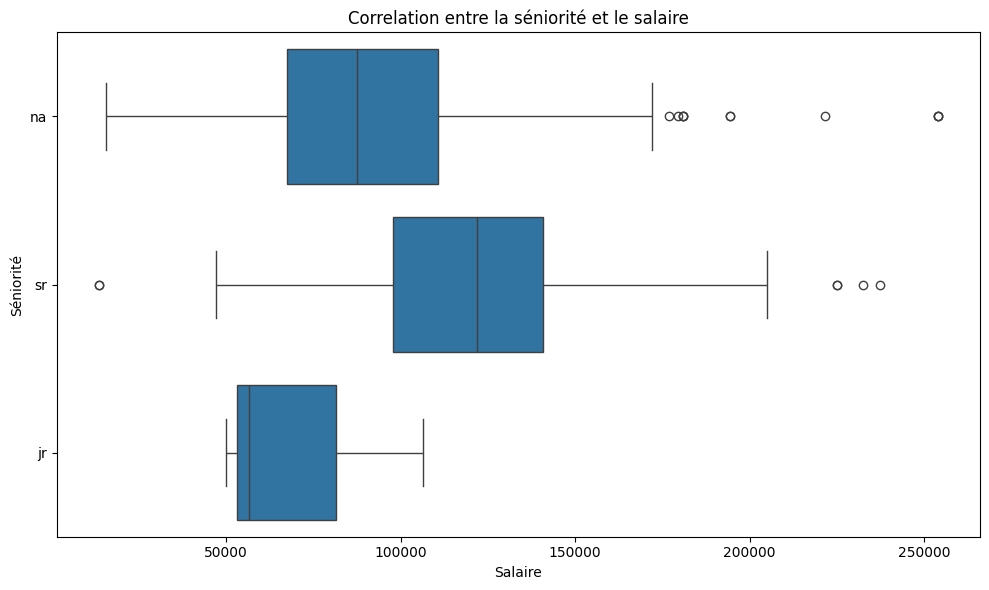

In [19]:
# 5. Correlation entre la séniorité et le salaire

# Plotting correlation between seniority and salary
plt.figure(figsize=(10, 6))
sns.boxplot(y='seniority_by_title', x='Salary Estimate Cleaned', data=data)
plt.title('Correlation entre la séniorité et le salaire')
plt.xlabel('Salaire')
plt.ylabel('Séniorité')
plt.tight_layout()
plt.show()

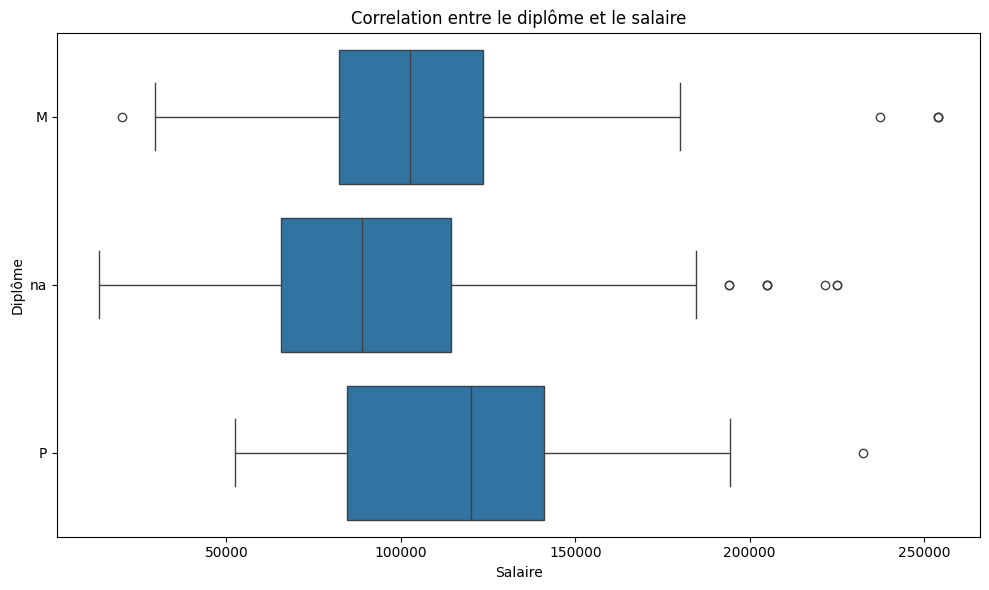

In [20]:
# 6. Correlation entre le diplôme et le salaire
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(y='Degree', x='Salary Estimate Cleaned', data=data)
plt.title('Correlation entre le diplôme et le salaire')
plt.xlabel('Salaire')
plt.ylabel('Diplôme')
plt.tight_layout()
plt.show()